In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv(r"C:\Users\parve\OneDrive\Desktop\INT327FINAL.csv")
data.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Araria,"Kharahiya Basti, Araria - BSPCB",12-04-2025 09:00,26.146529,87.454184,PM10,20.0,191.0,56.0
1,India,Bihar,Araria,"Kharahiya Basti, Araria - BSPCB",12-04-2025 09:00,26.146529,87.454184,NO2,6.0,7.0,7.0
2,India,Bihar,Araria,"Kharahiya Basti, Araria - BSPCB",12-04-2025 09:00,26.146529,87.454184,OZONE,8.0,19.0,10.0
3,India,Bihar,Arrah,"New DM Office, Arrah - BSPCB",12-04-2025 09:00,25.562610,84.663264,PM2.5,NaN,NaN,NaN
4,India,Bihar,Arrah,"New DM Office, Arrah - BSPCB",12-04-2025 09:00,25.562610,84.663264,PM10,NaN,NaN,NaN


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3219 non-null   object 
 1   state          3219 non-null   object 
 2   city           3219 non-null   object 
 3   station        3219 non-null   object 
 4   last_update    3219 non-null   object 
 5   latitude       3219 non-null   float64
 6   longitude      3219 non-null   float64
 7   pollutant_id   3219 non-null   object 
 8   pollutant_min  2878 non-null   float64
 9   pollutant_max  2878 non-null   float64
 10  pollutant_avg  2878 non-null   float64
dtypes: float64(5), object(6)
memory usage: 276.8+ KB


In [84]:
# Data Cleaning
print("Initial data shape:", data.shape)
data.dropna(inplace=True)
print("Data shape after dropping NA:", data.shape)

Initial data shape: (3219, 11)
Data shape after dropping NA: (2878, 11)


In [15]:
data.dropna(inplace=True)
# Basic statistics
print("Basic statistics:\n", data.describe())

Basic statistics:
           latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  2878.000000  2878.000000    2878.000000    2878.000000    2878.000000
mean     22.301007    78.672095      19.164698      71.706046      34.586171
std       5.527136     4.927057      19.751849      88.832229      33.610882
min       8.514909    70.909168       1.000000       1.000000       1.000000
25%      19.036458    75.555917       5.000000      17.000000      10.000000
50%      23.041137    77.400574      13.000000      45.000000      24.000000
75%      26.826410    80.854941      27.000000      91.000000      49.000000
max      34.066206    94.636574     336.000000     500.000000     336.000000


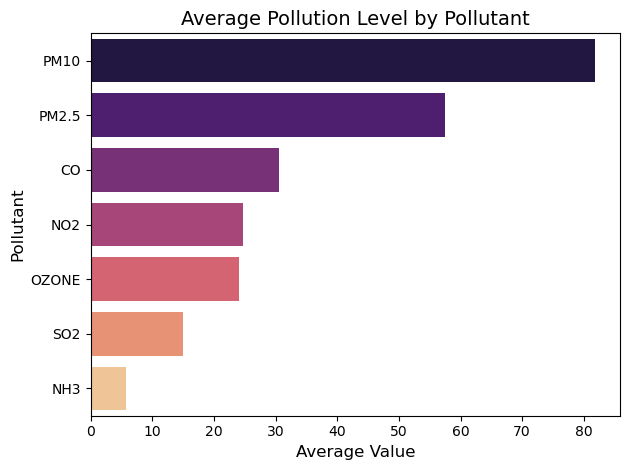

In [16]:

# 5. AVERAGE POLLUTION LEVEL BY POLLUTANT TYPE
pollutant_avg = data.groupby('pollutant_id')['pollutant_avg'].mean().sort_values(ascending=False)
avg_pollutant_df = pollutant_avg.reset_index()
avg_pollutant_df.columns = ['pollutant_id', 'pollutant_avg']

# Create the barplot
sns.barplot(
    data=avg_pollutant_df,
    x='pollutant_avg',
    y='pollutant_id',
    hue='pollutant_id',
    palette='magma',
    dodge=False,
    legend=False
)

plt.title("Average Pollution Level by Pollutant", fontsize=14)
plt.xlabel("Average Value", fontsize=12)
plt.ylabel("Pollutant", fontsize=12)
plt.tight_layout()
plt.show()

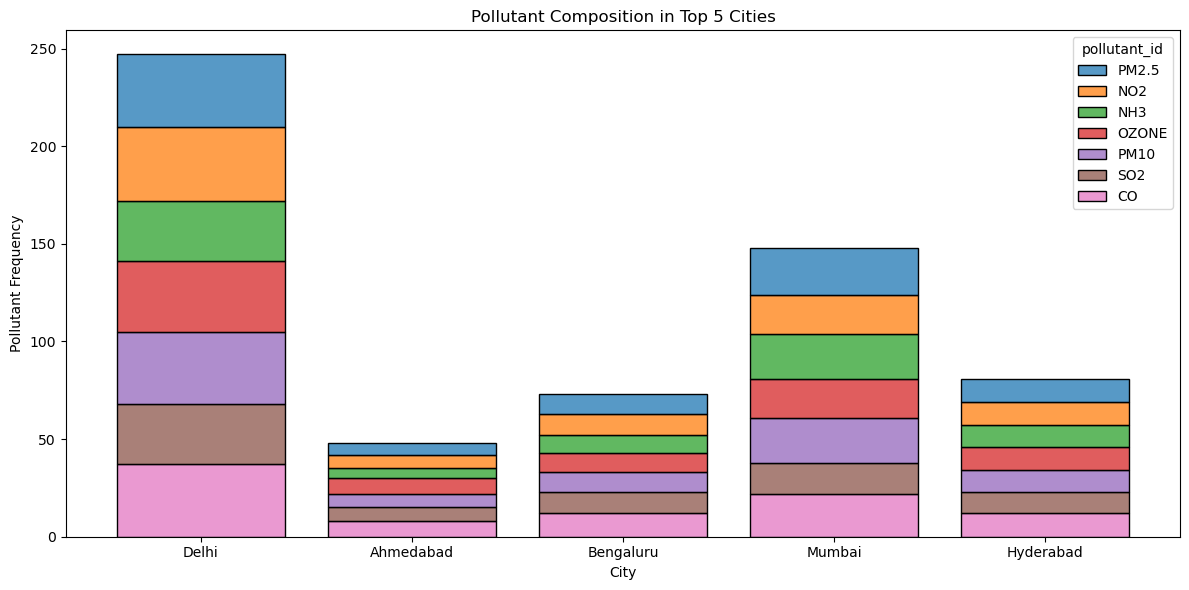

In [17]:
#Pollutant Composition in Top 5 Cities
top_cities = data['city'].value_counts().head(5).index
city_pollutant_mix = data[data['city'].isin(top_cities)]
#Pollutant Composition per City (Pie/Stacked Bar)
#Highlight which pollutants dominate in major cities.
plt.figure(figsize=(12, 6))
sns.histplot(data=city_pollutant_mix, x='city', hue='pollutant_id', multiple='stack', shrink=0.8)
plt.title("Pollutant Composition in Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Pollutant Frequency")
plt.tight_layout()
plt.show()

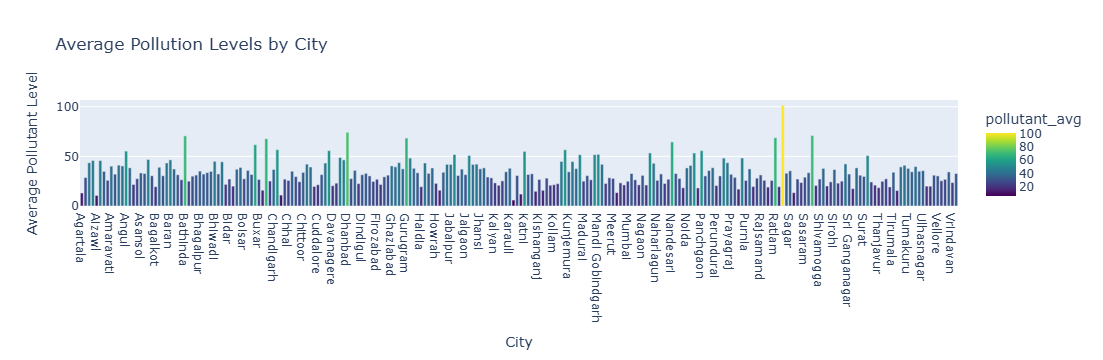

In [18]:
# Visualization - Bar Plot for Pollution Levels by City
city_pollution = data.groupby('city')[['pollutant_min', 'pollutant_max', 'pollutant_avg']].mean()
city_pollution.reset_index(inplace=True)

# Remove rows with NaN values after grouping
city_pollution.dropna(inplace=True)
fig = px.bar(city_pollution, x='city', y='pollutant_avg', title='Average Pollution Levels by City', color='pollutant_avg', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='City', yaxis_title='Average Pollutant Level')
fig.show()

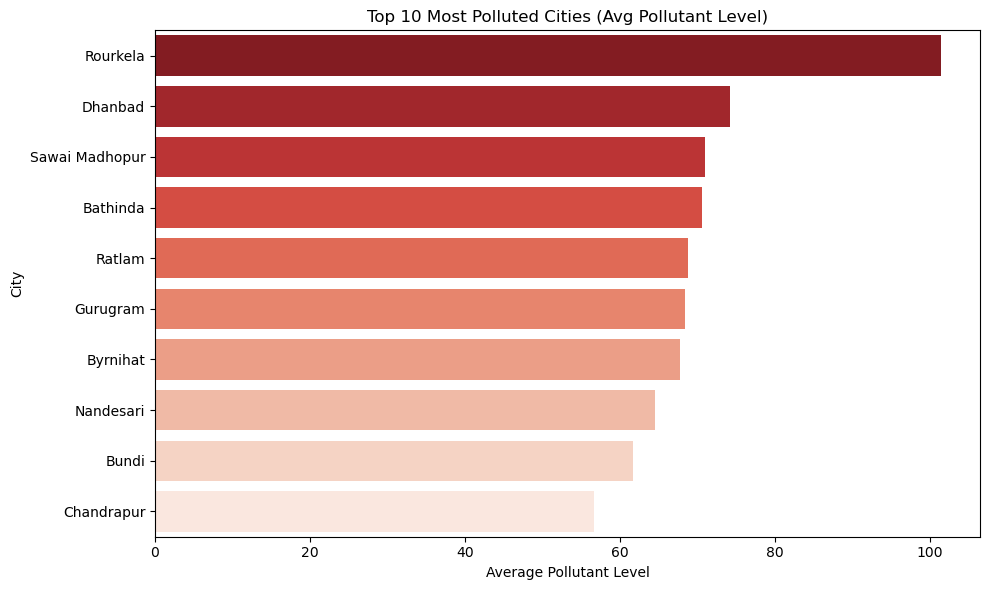


Most Polluted Cities:
city
Rourkela          101.400000
Dhanbad            74.250000
Sawai Madhopur     71.000000
Bathinda           70.600000
Ratlam             68.750000
Gurugram           68.400000
Byrnihat           67.714286
Nandesari          64.500000
Bundi              61.714286
Chandrapur         56.692308
Name: pollutant_avg, dtype: float64


In [19]:
# Group by city and calculate average pollution
city_pollution = data.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False)

# Top 10 Most Polluted Cities
most_polluted = city_pollution.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_polluted.values,hue=most_polluted.index,y=most_polluted.index, palette='Reds_r')
plt.title('Top 10 Most Polluted Cities (Avg Pollutant Level)')
plt.xlabel('Average Pollutant Level')
plt.ylabel('City')
plt.tight_layout()
plt.show()
# Optional: Print the top and bottom cities with their values
print("\nMost Polluted Cities:")
print(most_polluted)



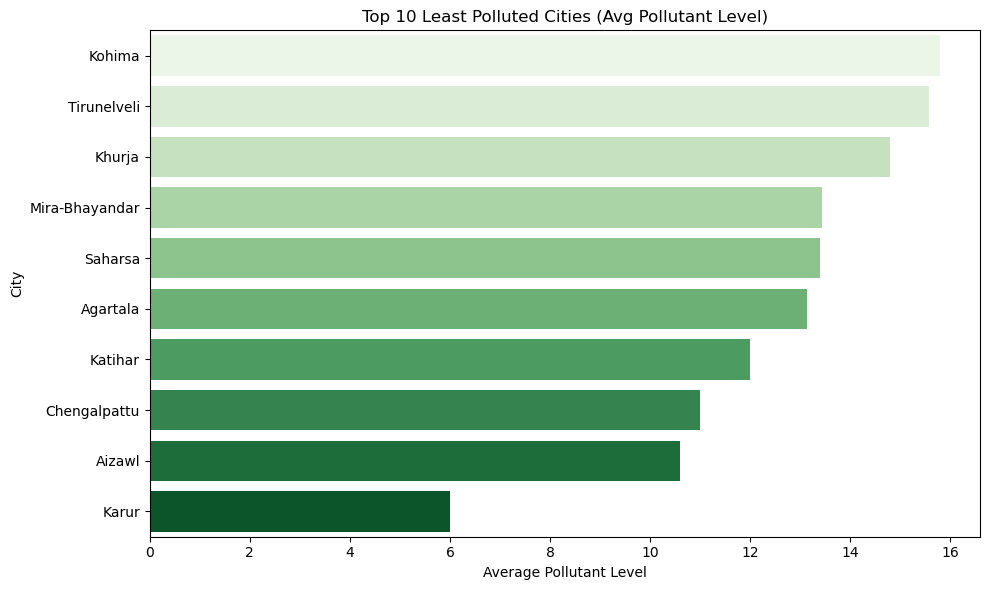


Least Polluted Cities:
city
Kohima            15.800000
Tirunelveli       15.571429
Khurja            14.800000
Mira-Bhayandar    13.428571
Saharsa           13.400000
Agartala          13.142857
Katihar           12.000000
Chengalpattu      11.000000
Aizawl            10.600000
Karur              6.000000
Name: pollutant_avg, dtype: float64


In [20]:
# Bottom 10 Least Polluted Cities (with non-zero values)
least_polluted = city_pollution[city_pollution > 0].tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_polluted.values,hue=least_polluted.index, y=least_polluted.index, palette='Greens')
plt.title('Top 10 Least Polluted Cities (Avg Pollutant Level)')
plt.xlabel('Average Pollutant Level')
plt.ylabel('City')
plt.tight_layout()
plt.show()


print("\nLeast Polluted Cities:")
print(least_polluted)

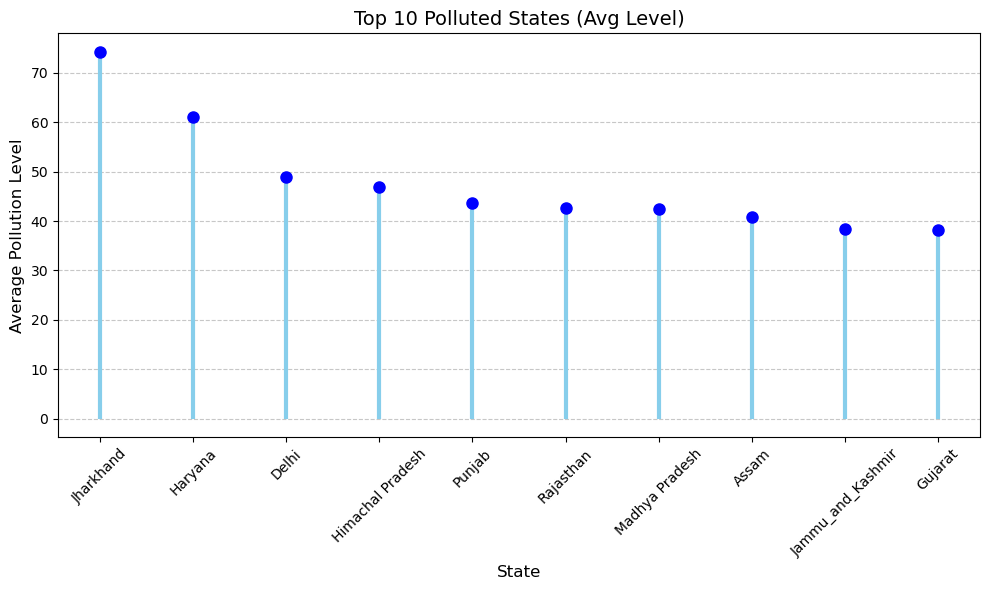

In [21]:

# 7. STATES WITH HIGHEST AVERAGE POLLUTION
# Data
top_states = data.groupby('state')['pollutant_avg'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))

# Lollipop stems
plt.vlines(x=top_states.index, ymin=0, ymax=top_states.values, color='skyblue', linewidth=3)

# Lollipop dots
plt.plot(top_states.index, top_states.values, "o", color='blue', markersize=8)

# Customize plot
plt.title("Top 10 Polluted States (Avg Level)", fontsize=14)
plt.ylabel("Average Pollution Level", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

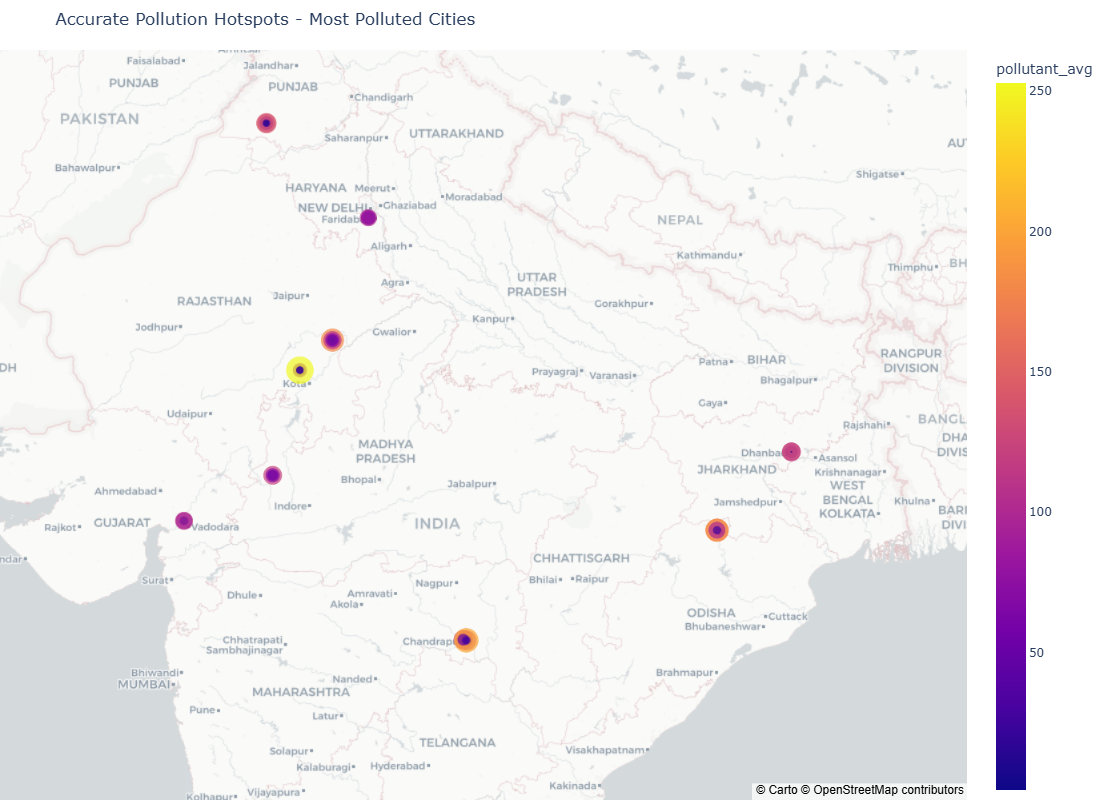

In [22]:
# Pollution Hotspot Detection
# Filter original data for stations in most polluted cities

city_hotspots = data[data['city'].isin(hotspot_cities)]

# DROP rows where pollutant_avg is NaN
city_hotspots = city_hotspots.dropna(subset=['pollutant_avg'])

# Plot the map
fig3 = px.scatter_mapbox(
    city_hotspots,
    lat='latitude',
    lon='longitude',
    color='pollutant_avg',
    size='pollutant_avg',
    hover_name='station',
    zoom=5,
    mapbox_style='carto-positron',
    title='Accurate Pollution Hotspots - Most Polluted Cities'
)

# Adjust layout for full view
fig3.update_layout(
    autosize=False,
    width=1400,
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig3.show()




**Problem Statement: Air Quality Analysis and Pollution Hotspot Detection**

Air pollution poses significant environmental and public health risks across urban and rural areas. With rising industrialization and vehicular emissions, it's essential to understand the distribution, intensity, and sources of pollution across regions. The primary goal of this project is to analyze real-world air quality data to uncover patterns and identify critical pollution zones across Indian cities and states.

---

**Objectives of the Project:**

This project focuses on **data-driven analysis** of air quality using pollutant measurements from different monitoring stations. The key objectives include:

1. **Data Cleaning and Preprocessing**  
   - Handle missing values and ensure clean, structured data for analysis.

2. **Pollutant Type Analysis**  
   - Calculate and visualize average pollutant levels by pollutant types to understand the most dominant and harmful pollutants.

3. **City-Level Pollution Comparison**  
   - Evaluate and visualize average pollution levels across all cities.
   - Identify the **top 10 most polluted cities** and **least polluted cities** using average pollutant levels.

4. **Pollutant Composition in Major Cities**  
   - Examine the **distribution of pollutant types** in the top 5 most active cities based on monitoring frequency, using stacked bar charts.

5. **State-Level Pollution Assessment**  
   - Analyze the **top 10 most polluted states** to identify geographical clusters with high average pollutant levels.

6. **Pollution Hotspot Detection**  
   - Use **geospatial visualization** (Mapbox scatter plots) to detect pollution hotspots based on station-wise pollutant levels in the most polluted cities.

7. **Visual Insights for Decision-Making**  
   - Present visualizations using **Seaborn**, **Matplotlib**, and **Plotly** to make data insights more intuitive and actionable.


